# PART II: Data Handling and Visualization


## General Remarks
- script data access for common tasks (bash, python)
- frequent tasks should be a single command
- learn a scripting language (C/C++/Java are too verbose)

## Use UNIX
- Rich set of data mangling tools available
- Can work with streams (not only files)
- Does not hide the details (lilke Windows UIs)
- Was designed to do data handling jobs
- Pipes to compose tools
- E.g. can use ssh to connect to remote servers (get CPU stats from remote)

## Use CSV files
- Widely supported (Spreadsheets, Excel, Programming Languages, DBs, GitHub!)
- Portable (if you stick to ASCII or utf-8)
- Human readable
- Good tooling (cat, grep, csvkit)
- Can be used like SQL tables (e.g. Join tables for many-many relations)
- XML/JSON are describing trees (not lists or tables)
- Use compression (zcat or cat | gzip -d to read and | gzip > out.csv)

- Use proper csv (not '\t' separators and the like)

# Tools

## Handling text streams with UNIX tools

In [115]:
# cat: print output to stdout
# !cat DataSets/LogDB.csv # long output

In [116]:
# Print only first 10 lines
# Pipe: connect stdout to stdin stream of next command
!cat DataSets/LogDB.out | head

192.168.13.72 - - [08/May/2015:12:00:00 -0000] "POST /doc/0 HTTP/1.1" 200 138 0.155
192.168.13.85 - - [08/May/2015:12:00:00 -0000] "PUT /doc/1 HTTP/1.1" 200 265 11.933
192.168.13.75 - - [08/May/2015:12:00:00 -0000] "POST /doc/2 HTTP/1.1" 200 138 1.190
192.168.13.85 - - [08/May/2015:12:00:01 -0000] "PUT /doc/1 HTTP/1.1" 200 265 34.552
192.168.13.13 - - [08/May/2015:12:00:01 -0000] "GET /doc/3 HTTP/1.1" 200 4047 0.394
192.168.13.13 - - [08/May/2015:12:00:01 -0000] "GET /doc/4 HTTP/1.1" 200 795 0.080
192.168.13.85 - - [08/May/2015:12:00:01 -0000] "PUT /doc/1 HTTP/1.1" 200 265 11.649
192.168.13.66 - - [08/May/2015:12:00:01 -0000] "GET /doc/3 HTTP/1.1" 200 4047 0.351
192.168.13.66 - - [08/May/2015:12:00:01 -0000] "GET /doc/4 HTTP/1.1" 200 795 0.068
192.168.13.85 - - [08/May/2015:12:00:01 -0000] "PUT /doc/1 HTTP/1.1" 200 265 6.433
cat: write error: Broken pipe


In [117]:
# Print only first 3 lines
!seq 10 | head -n 3

1
2
3


In [118]:
# Print the first n-3 lines
!seq 10 | head -n-3

1
2
3
4
5
6
7


In [119]:
# Last 3 lines
!seq 10 | tail -n 3

8
9
10


In [120]:
# Last n-3 lines: skip first 2 lines
!seq 10 | tail -n+3

3
4
5
6
7
8
9
10


In [126]:
# Filter matching lines with grep
# Count lines with wc -l
!cat DataSets/LogDB.out | grep GET | wc -l

3335


## perl -pe

```
-e: Allows you to provide the program as an argument rather
    than in a file. You don't want to have to create a script
    file for every little Perl one-liner.

-p: Places a printing loop around your command so that it acts on each
    line of standard input. Used mostly so Perl can beat the
    pants off awk in terms of power AND simplicity :-)
        
```

* Very powerful regular expressions
* Sane, widely known syntax

In [185]:
# Parse Log Files with perl -pe
!cat DataSets/LogDB.out | perl -pe 's/.*"(.*)".*/\1/' | head


# Full csv conversion:
# !cat DataSets/LogDB.out | perl -pe 's/^.*"(.*?) (.*)? (.*)?" (\d+) (\d+) (\d+.\d+)$/\1,\2,\4,\5,\6/' |  head

POST /doc/0 HTTP/1.1
PUT /doc/1 HTTP/1.1
POST /doc/2 HTTP/1.1
PUT /doc/1 HTTP/1.1
GET /doc/3 HTTP/1.1
GET /doc/4 HTTP/1.1
PUT /doc/1 HTTP/1.1
GET /doc/3 HTTP/1.1
GET /doc/4 HTTP/1.1
PUT /doc/1 HTTP/1.1
-p destination: Broken pipe
cat: write error: Broken pipe


## csvkit (http://csvkit.readthedocs.org/en/0.9.1/)

* Set of tools to handle csv files at the command line

In [191]:
# pretty print CSV files with csvlook
#
# -H no headder row provided
!csvlook -H DataSets/cpu.out.csv | head

|----------+---------+---------+---------+---------+----------|
|  column1 | column2 | column3 | column4 | column5 | column6  |
|----------+---------+---------+---------+---------+----------|
|  16      | 6       | 78      | 0       | 0       | 0        |
|  5       | 3       | 92      | 0       | 0       | 0        |
|  6       | 3       | 91      | 0       | 0       | 0        |
|  4       | 2       | 93      | 0       | 0       | 0        |
|  4       | 3       | 93      | 0       | 0       | 0        |
|  7       | 2       | 91      | 0       | 0       | 0        |
|  4       | 2       | 94      | 0       | 0       | 0        |


In [140]:
# Print summary statistics for each column
!csvstat -H DataSets/cpu.out.csv

  1. column1
	<type 'int'>
	Nulls: False
	Min: 4
	Max: 88
	Sum: 3056
	Mean: 30.2574257426
	Median: 21
	Standard Deviation: 25.0495166908
	Unique values: 50
	5 most frequent values:
		5:	8
		16:	7
		27:	4
		20:	4
		7:	4
  2. column2
	<type 'int'>
	Nulls: False
	Min: 2
	Max: 15
	Sum: 634
	Mean: 6.27722772277
	Median: 6
	Standard Deviation: 3.17826408775
	Unique values: 13
	5 most frequent values:
		6:	17
		3:	14
		5:	14
		4:	10
		2:	9
  3. column3
	<type 'int'>
	Nulls: False
	Min: 1
	Max: 94
	Sum: 6364
	Mean: 63.0099009901
	Median: 72
	Standard Deviation: 27.9693945355
	Unique values: 53
	5 most frequent values:
		93:	5
		92:	5
		5:	4
		6:	4
		79:	4
  4. column4
	<type 'int'>
	Nulls: False
	Values: 0, 1, 2
  5. column5
	<type 'int'>
	Nulls: False
	Values: 0
  6. column6
	<type 'int'>
	Nulls: False
	Values: 0, 1, 2

Row count: 101


In [187]:
# convert between different formats

#!csvformat -h

# to "-T" tab separated output, "-U 1" quote all
!echo "Convert csv to tsv with quoting"
!cat DataSets/cpu.out.csv | head -n 3 | csvformat -T -U 1

!echo "\n\nConvert back to csv"
!cat DataSets/cpu.out.csv | head -n 3 | csvformat -T -U 1 | csvformat -t -u 1

Convert csv to tsv with quoting
"16"	"6"	"78"	"0"	"0"	"0"
"5"	"3"	"92"	"0"	"0"	"0"
"6"	"3"	"91"	"0"	"0"	"0"


Convert back to csv
16,6,78,0,0,0
5,3,92,0,0,0
6,3,91,0,0,0


In [163]:
# Select columns from dataset
!cat DataSets/cpu.out.csv | head -n 3 | csvcut -c 1-3

16,6,78
5,3,92
6,3,91


# JSON Handling

* jq http://stedolan.github.io/jq/
* like xpath, xidel for XML


In [175]:
# pretty print
!cat DataSets/HistogramAPI.json | jq '.' | head

[
  [
    1358024400,
    1800,
    {
      "0.5": 1,
      "0.59": 2,
      "1.7": 1,
      "2.5": 1,
      "3.4": 1,


In [188]:
# Extract Histogram and convert to csv
!cat DataSets/HistogramAPI.json | jq '.[0][2] | to_entries | .[] | [.key, .value] | @csv' --raw-output | csvformat -U 0 | head

0.5,1
0.59,2
1.7,1
10,193
100,1
11,209
12,223
120,1
13,176
14,163


## Feedgnuplot - Quick plotting from the command line
  
* https://github.com/dkogan/feedgnuplot


## IPython notebook

* Start with `ipython notebook`

* Offerst this browser based programming environment

* Cells for Markup and Code

* Can mix in shell comands with `!` syntax

In [2]:
files = !uname -a
print files

['Linux X230 3.5.0-54-generic #81~precise1-Ubuntu SMP Tue Jul 15 04:02:22 UTC 2014 x86_64 x86_64 x86_64 GNU/Linux']


## Numpy (http://www.numpy.org/)

* Numerical Python
* High performance array implementation
* Vectorized operations
* Rich math library
* Tools to intergrate Fortran/C/C++ code

In [3]:
import numpy as np

# Online Help: np?

In [4]:
## Creating an array
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
A.shape

(2, 3)

In [6]:
# homogenous type (automatically inferred)
A.dtype

dtype('int64')

In [7]:
# Scalar operations are applied element wise (Broadcasting)
A + 5

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [8]:
A / 3

array([[0, 0, 1],
       [1, 1, 2]])

In [9]:
# Array operations are applied elementwise
A + A

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [10]:
A * A

array([[ 1,  4,  9],
       [16, 25, 36]])

In [11]:
A / A

array([[1, 1, 1],
       [1, 1, 1]])

In [12]:
# Many functions operate elementwise
np.log(A)

array([[ 0.        ,  0.69314718,  1.09861229],
       [ 1.38629436,  1.60943791,  1.79175947]])

In [13]:
# Read data from file
X = np.loadtxt("DataSets/ReqMultiNode.csv", delimiter=",")

# For handling missing data use
# X = np.genfromtxt("DataSets/ReqMultiNode.csv")

In [14]:
X.shape

(2000, 7)

In [15]:
# Slicing and Indexing

# first row
A[0] 

array([1, 2, 3])

In [16]:
# last row
A[-1]

array([4, 5, 6])

In [17]:
A[0:1] # rows [0 - 1)

array([[1, 2, 3]])

In [18]:
X[0:10:3] # rows [0 - 10) in steps of 3

array([[  1.39875690e+09,   1.21666706e+00,   9.96667027e-01,
          1.23333299e+00,   8.83333027e-01,   1.03666306e+00,
          1.02333295e+00],
       [  1.39875780e+09,   1.03333294e+00,   8.63332987e-01,
          1.09333301e+00,   7.73333013e-01,   8.99999976e-01,
          8.66666973e-01],
       [  1.39875870e+09,   7.73330986e-01,   7.16666996e-01,
          8.36667001e-01,   6.06666982e-01,   7.66667008e-01,
          7.43332982e-01],
       [  1.39875960e+09,   9.83332992e-01,   7.63333023e-01,
          1.10999596e+00,   7.23333001e-01,   7.69999981e-01,
          7.76666999e-01]])

In [19]:
X[0:10:3,3] # only third column

array([ 1.23333299,  1.09333301,  0.836667  ,  1.10999596])

In [20]:
# Boolean Indexing
X[:,1] < 1

array([False, False, False, ..., False, False, False], dtype=bool)

In [21]:
print X[X[:,1] < 1].shape
X[X[:,1] < 1]

(463, 7)


array([[  1.39875810e+09,   9.89997029e-01,   7.76666999e-01, ...,
          8.16667020e-01,   8.96667004e-01,   8.60000014e-01],
       [  1.39875870e+09,   7.73330986e-01,   7.16666996e-01, ...,
          6.06666982e-01,   7.66667008e-01,   7.43332982e-01],
       [  1.39875900e+09,   8.36669028e-01,   6.93331003e-01, ...,
          6.89999998e-01,   8.00000012e-01,   8.13332975e-01],
       ..., 
       [  1.39929330e+09,   8.83333027e-01,   7.33335972e-01, ...,
          7.96666980e-01,   8.39999974e-01,   8.03332984e-01],
       [  1.39929360e+09,   8.13332975e-01,   6.49999976e-01, ...,
          7.79999971e-01,   8.36667001e-01,   8.73332977e-01],
       [  1.39929390e+09,   9.73333001e-01,   7.03333020e-01, ...,
          8.06666970e-01,   9.66666996e-01,   7.73333013e-01]])

In [22]:
# Some statistical methods

print A.mean(), A.max(), A.min()
print np.percentile(A, 20)
print np.median(A)


3.5 6 1
2.0
3.5


# Matplotlib (http://matplotlib.org/)

* Powerful python plotting libarary
* Tools like seaborn, pandas are based on it
* Offers Object oriented API and pyplot MATLAB-like stateful API.
* Tutorial: https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#ipython-and-the-pylab-mode

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt

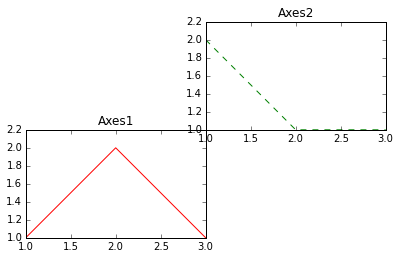

In [65]:
# Figure object provides canvas to paint on
f = plt.figure()

# set size in inces
f.set_figheight(3)
f.set_figwidth(5)

# Add coordinate system with rectangle coordinates
ax1 = f.add_axes([0,0,0.5,0.5])
ax2 = f.add_axes([0.5,0.5,0.5,0.5])

# Set title
ax1.set_title("Axes1")
ax2.set_title("Axes2")

# Plot something on axes: Creates list of line objects
l1 = ax1.plot([1,2,3],[1,2,1])
l2 = ax2.plot([1,2,3],[2,1,1], linestyle='--')

l1[0].set_color("red")
l2[0].set_color("green")

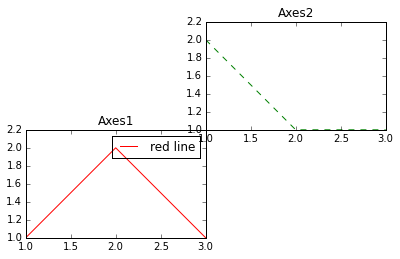

In [66]:
ax1.legend(['red line'])
f

(0, 6)

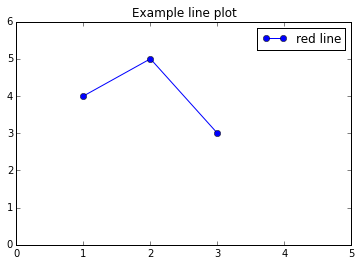

In [72]:
# Simplified Plotting with pyplot
# Manages figure and axis in background

plt.plot([1,2,3],[4,5,3], 'o-')
plt.title("Example line plot")
plt.legend(["red line"])
plt.xlim(0,5)
plt.ylim(0,6)

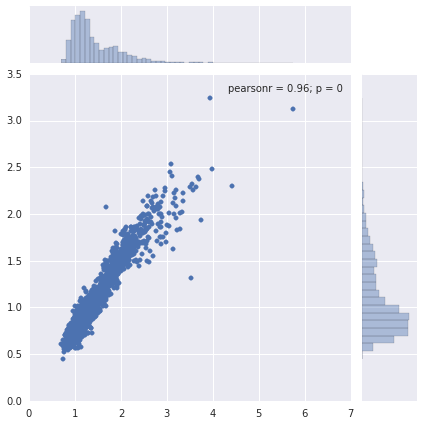

In [76]:
# Seaborn Statistical Data Visualization:
# http://stanford.edu/~mwaskom/software/seaborn/index.html

import seaborn as sns

sns.jointplot(X[:,3],X[:,4])